In [1]:
!mv /Users/camerondavidson-pilon/Downloads/*.dump.gz ..

(B

In [2]:
!gzip -f -d ../*.dump.gz

(B

In [3]:
!rm ../morbidostat.db
!sqlite3 ../morbidostat.db < ../od_readings_raw.dump
!sqlite3 ../morbidostat.db < ../io_events.dump

(B(B(B

In [32]:
import pandas as pd
import sqlite3
con = sqlite3.connect("../morbidostat.db")
experiment = "Trial-8-9cc54cf29c0840baa4ce438463ace834"
unit = 1
df = pd.read_sql_query(f'SELECT * from od_readings_raw WHERE morbidostat_unit="{unit}"', con)


In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index("timestamp")


In [34]:
df

,morbidostat_unit,od_reading_v,experiment,angle
timestamp,,,,
2020-08-20 14:44:27.333000+00:00,1,0.951029,new-media-test,135
2020-08-20 14:44:28.351000+00:00,1,0.951029,new-media-test,135
2020-08-20 14:44:29.424000+00:00,1,0.951029,new-media-test,135
2020-08-20 14:44:30.528000+00:00,1,0.951029,new-media-test,135
2020-08-20 14:44:31.620000+00:00,1,0.951029,new-media-test,135
...,...,...,...,...
2020-09-28 12:51:01.787000+00:00,1,0.077440,Trial-8-9cc54cf29c0840baa4ce438463ace834,90
2020-09-28 12:51:06.731000+00:00,1,0.508484,Trial-8-9cc54cf29c0840baa4ce438463ace834,135
2020-09-28 12:51:06.766000+00:00,1,0.077190,Trial-8-9cc54cf29c0840baa4ce438463ace834,90


In [70]:
df = df.loc["2020-09-24 17:00:00":"2020-09-28 12:00:00"]

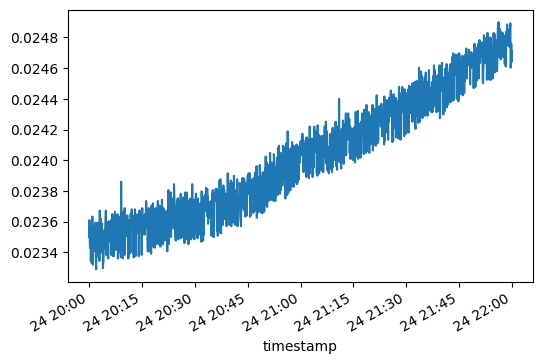

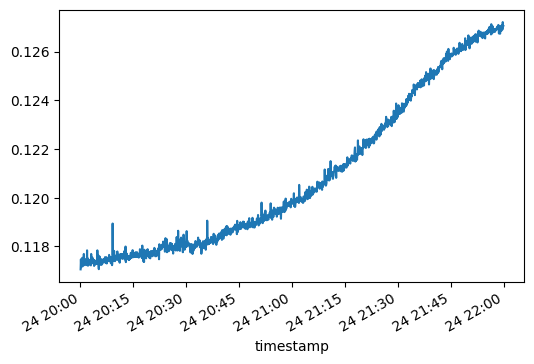

In [96]:
for _, g in df.loc["2020-09-24 20:00:00":"2020-09-24 22:00:00"].groupby("angle")['od_reading_v']:
    plt.figure()
    g.plot()

In [72]:
df

,morbidostat_unit,od_reading_v,experiment,angle
timestamp,,,,
2020-09-24 17:35:42+00:00,1,0.121004,,135
2020-09-24 17:35:42+00:00,1,0.022751,,90
2020-09-24 17:35:47+00:00,1,0.121316,,135
2020-09-24 17:35:47+00:00,1,0.023126,,90
2020-09-24 17:35:52+00:00,1,0.121254,,135
...,...,...,...,...
2020-09-28 11:59:47+00:00,1,0.077627,Trial-8-9cc54cf29c0840baa4ce438463ace834,90
2020-09-28 11:59:52+00:00,1,0.510828,Trial-8-9cc54cf29c0840baa4ce438463ace834,135
2020-09-28 11:59:52+00:00,1,0.077502,Trial-8-9cc54cf29c0840baa4ce438463ace834,90


In [73]:
df.index = df.index.round('S')

In [74]:
df.shape

(130176, 4)

In [75]:
df_ = df.loc[df.groupby(level=0).size() == 2]

In [76]:
df_.shape

(129948, 4)

In [77]:
class ExtendedKalmanFilter:
    """
    Based on the algorithm in
    https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181923#pone.0181923.s007

    The idea is that each sensor will evolve like:

    OD_{i, t+1} = OD_{i, t} * r_t

    for all i, t.

    This model is pretty naive (different sensors will behave / saturate differently).

    Example
    ---------

        initial_state = np.array([obs.iloc[0], 1.])
        initial_covariance = np.eye(2)
        process_noise_covariance = np.array([[0.00001, 0], [0, 1e-13]])
        observation_noise_covariance = 0.2
        ekf = ExtendedKalmanFilter(initial_state, initial_covariance, process_noise_covariance, observation_noise_covariance)

        ekf.update(...)
        ekf.state_

    """

    def __init__(self, initial_state, initial_covariance, process_noise_covariance, observation_noise_covariance):
        assert initial_state.shape[0] == initial_covariance.shape[0] == initial_covariance.shape[1]
        assert process_noise_covariance.shape == initial_covariance.shape
        assert self._is_positive_definite(process_noise_covariance)
        assert self._is_positive_definite(initial_covariance)
        assert self._is_positive_definite(observation_noise_covariance)

        self._process_noise_covariance = process_noise_covariance
        self.observation_noise_covariance = observation_noise_covariance
        self.state_ = initial_state
        self.covariance_ = initial_covariance
        self.dim = self.state_.shape[0]

        self._OD_scale_counter = -1
        self._rate_scale_counter = -1

        self._original_process_noise_variance = np.diag(self._process_noise_covariance)[: (self.dim - 1)].copy()
        self._original_rate_noise_variance = self._process_noise_covariance[-1, -1]

    def predict(self):
        return (self._predict_state(self.state_, self.covariance_), self._predict_covariance(self.state_, self.covariance_))

    def update(self, observation):
        # TODO: incorporate delta_time
        assert observation.shape[0] + 1 == self.state_.shape[0]
        state_prediction, covariance_prediction = self.predict()
        residual_state = observation - state_prediction[:-1]
        H = self._jacobian_observation()
        residual_covariance = H @ covariance_prediction @ H.T + self.observation_noise_covariance
        kalman_gain = covariance_prediction @ H.T @ np.linalg.inv(residual_covariance)
        self.state_ = state_prediction + kalman_gain @ residual_state
        self.covariance_ = (np.eye(self.dim) - kalman_gain @ H) @ covariance_prediction
        return

    def scale_OD_variance_for_next_n_steps(self, factor, n):
        d = self.dim
        self._OD_scale_counter = n
        self._process_noise_covariance[np.arange(d - 1), np.arange(d - 1)] = factor * self._original_process_noise_variance

    def scale_rate_variance_for_next_n_steps(self, factor, n):
        d = self.dim
        self._rate_scale_counter = n
        self._process_noise_covariance[-1, -1] = factor * self._original_rate_noise_variance

    def process_noise_covariance(self):
        if self._OD_scale_counter == 0:
            d = self.dim
            self._process_noise_covariance[np.arange(d - 1), np.arange(d - 1)] = self._original_process_noise_variance
        self._OD_scale_counter -= 1

        if self._rate_scale_counter == 0:
            self._process_noise_covariance[-1, -1] = self._original_rate_noise_variance
        self._rate_scale_counter -= 1
        return self._process_noise_covariance

    def _predict_state(self, state, covariance):
        return np.array([v * state[-1] for v in state[:-1]] + [state[-1]])

    def _predict_covariance(self, state, covariance):
        return self._jacobian_process(state) @ covariance @ self._jacobian_process(state).T + self.process_noise_covariance()

    def _jacobian_process(self, state):
        """
        The prediction process is
        [
            OD_{1, t+1} = OD_{1, t} * r_t
            OD_{2, t+1} = OD_{2, t} * r_t
            ...
            r_{t+1} = r_t

        ]

        """
        d = self.dim
        J = np.zeros((d, d))

        rate = state[-1]
        ODs = state[:-1]

        J[np.arange(d - 1), np.arange(d - 1)] = rate
        J[np.arange(d - 1), np.arange(1, d)] = ODs
        J[-1, -1] = 1.0

        return J

    def _jacobian_observation(self):
        """
        We only observe the ODs
        """
        d = self.dim
        return np.eye(d)[: (d - 1)]

    @staticmethod
    def _is_positive_definite(A):
        if np.array_equal(A, A.T):
            try:
                return True
            except np.linalg.LinAlgError:
                return False
        else:
            return False

In [78]:
df_.head(2)

,morbidostat_unit,od_reading_v,experiment,angle
timestamp,,,,
2020-09-24 17:35:42+00:00,1,0.121004,,135
2020-09-24 17:35:42+00:00,1,0.022751,,90


In [83]:
initial_state = np.array([0.022751, 0.121004, 1.0000])
d = initial_state.shape[0]

# empirically picked constants
initial_covariance = np.block([
    [1e-4 * np.ones((d-1, d-1)), 1e-7 * np.ones((d-1, 1))], [1e-7 * np.ones((1, d-1)), 1e-8]
])

OD_process_covariance = 1e-10 * np.ones((d-1, d-1))
OD_process_covariance[0, 0] = 1e-7
OD_process_covariance[1, 1] = 1e-5
rate_process_variance = (
    5e-12
)  # think of this as a weighting between how much do I trust the model (lower value => rate_t == rate_{t-1}) vs how much do I trust the observations
process_noise_covariance = np.block(
    [[OD_process_covariance, 1e-12 * np.ones((d - 1, 1))], [1e-12 * np.ones((1, d - 1)), rate_process_variance]]
)

observation_noise_covariance = 1e-3 * np.eye(d - 1) # this is a function of the ADS resolution at a gain
ekf = ExtendedKalmanFilter(
    initial_state, initial_covariance, process_noise_covariance, observation_noise_covariance,
)

In [84]:
results = []
index = []

for i, g in df_.groupby(level=0):
        ekf.update(g.sort_values("angle")['od_reading_v'].values)
        results.append(ekf.state_)
        index.append(i)

results = pd.DataFrame(results, columns=['90', '135',  'rate'], index=index)

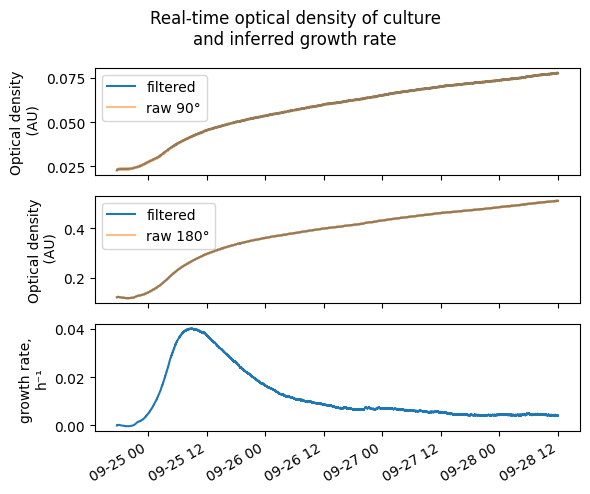

In [127]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
f, axes = plt.subplots(3, 1, figsize=(6, 5), sharex=True)
f.suptitle("Real-time optical density of culture\nand inferred growth rate")


results['90'].plot(label="filtered", ax=axes[0])
axes[0].plot(df_.loc[df_['angle'] == 90]['od_reading_v'], alpha=0.5, label="raw 90°")
axes[0].legend()
axes[0].set_ylabel("Optical density\n (AU)")

results['135'].plot(label="filtered", ax=axes[1])
axes[1].plot(df_.loc[df_['angle'] == 135]['od_reading_v'], alpha=0.5, label="raw 180°")
axes[1].legend()
axes[1].set_ylabel("Optical density\n (AU)")

(np.log(results['rate'])*60*60*0.2).plot(ax=axes[2])
axes[2].set_ylabel("growth rate, \nh⁻¹")

plt.tight_layout()
plt.savefig("/Users/camerondavidson-pilon/code/controlled_mold/assets/images/bioreactor_project/introduction/rt1.png")


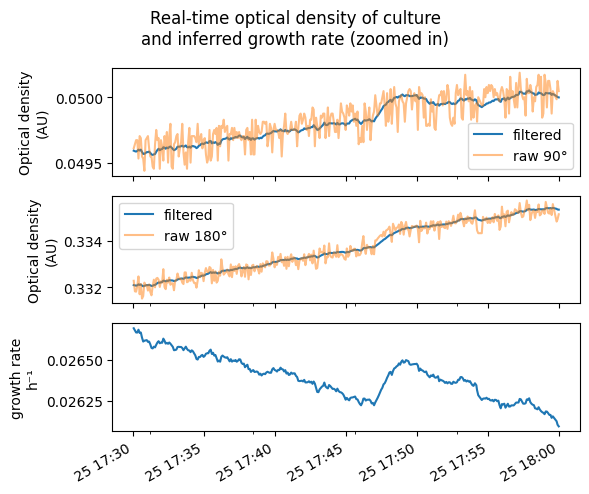

In [134]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
f, axes = plt.subplots(3, 1, figsize=(6, 5), sharex=True)
f.suptitle("Real-time optical density of culture\nand inferred growth rate (zoomed in)")

slice_ = slice("2020-09-25 17:30:00", "2020-09-25 18:00:00")

results['90'].loc[slice_].plot(label="filtered", ax=axes[0])
axes[0].plot(df_.loc[df_['angle'] == 90]['od_reading_v'].loc[slice_], alpha=0.5, label="raw 90°")
axes[0].legend()
axes[0].set_ylabel("Optical density\n(AU)")

results['135'].loc[slice_].plot(label="filtered", ax=axes[1])
axes[1].plot(df_.loc[df_['angle'] == 135]['od_reading_v'].loc[slice_], alpha=0.5, label="raw 180°")
axes[1].legend()
axes[1].set_ylabel("Optical density\n(AU)")

(np.log(results['rate'].loc[slice_])*60*60*0.2).plot(ax=axes[2])
axes[2].set_ylabel("growth rate\nh⁻¹")

plt.tight_layout()

plt.savefig("/Users/camerondavidson-pilon/code/controlled_mold/assets/images/bioreactor_project/introduction/rt2.png")

